# Clasificación

## Regresión logística

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('churn-bigml-80.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.shape

(2666, 20)

In [2]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')

In [3]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
original_df = df.copy()

In [5]:
CAT_COLS = ['state', 'area_code', 'international_plan', 'voice_mail_plan']

In [6]:
df.dtypes

state                      object
account_length              int64
area_code                   int64
international_plan         object
voice_mail_plan            object
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls             int64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls             int64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls           int64
total_night_charge        float64
total_intl_minutes        float64
total_intl_calls            int64
total_intl_charge         float64
customer_service_calls      int64
churn                        bool
dtype: object

In [7]:
df.state.value_counts().size

51

In [8]:
df.churn.value_counts(normalize=True)

False    0.854464
True     0.145536
Name: churn, dtype: float64

In [9]:
df.area_code.value_counts()

415    1318
510     679
408     669
Name: area_code, dtype: int64

In [10]:
df.international_plan.value_counts(normalize=True)

No     0.898725
Yes    0.101275
Name: international_plan, dtype: float64

In [11]:
df.voice_mail_plan.value_counts(normalize=True)

No     0.725056
Yes    0.274944
Name: voice_mail_plan, dtype: float64

In [12]:
df.international_plan = df.international_plan.eq('Yes').astype('int')
df.voice_mail_plan = df.voice_mail_plan.eq('Yes').astype('int')
df.churn = df.churn.astype('int')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [13]:
df = pd.get_dummies(df, columns=['state', 'area_code'], prefix_sep='__')
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state__UT,state__VA,state__VT,state__WA,state__WI,state__WV,state__WY,area_code__408,area_code__415,area_code__510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0


In [14]:
df.dtypes.value_counts()

uint8      54
int64      10
float64     8
dtype: int64

## Train test split

In [15]:
X = df.drop('churn', axis=1)
y = df.churn

In [16]:
from sklearn.model_selection import train_test_split

X_train,  X_test, y_train, y_test = train_test_split(X, 
                                                     y, 
                                                     stratify = original_df.state,
                                                     train_size=0.8, 
                                                     random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

/home/infinitemonkeys/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((2132, 71), (2132,), (534, 71), (534,))

### Modelo básico

In [17]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty='l2', C=1.0)
log_reg.fit(X, y)

/home/infinitemonkeys/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
y_train_pred_proba = log_reg.predict_proba(X_train)[:, 1]
y_test_pred_proba = log_reg.predict_proba(X_test)[:, 1]
(y_test_pred_proba > 0.5).mean()

0.05805243445692884

ROC AUC:

- 0.5 -> modelo aleatorio
- 1.0 -> modelo perfecto

In [20]:
from sklearn.metrics import classification_report, roc_auc_score

roc_auc_score(y_train, y_train_pred_proba)

0.8412487043648509

In [21]:
roc_auc_score(y_test, y_test_pred_proba)

0.8216931216931217

In [22]:
print(classification_report(y_train, y_train_pred_proba > 0.2))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1828
           1       0.41      0.68      0.52       304

   micro avg       0.82      0.82      0.82      2132
   macro avg       0.68      0.76      0.70      2132
weighted avg       0.87      0.82      0.83      2132



In [23]:
from sklearn.metrics import accuracy_score


accuracy_score(y_train, y_train_pred_proba > 0.5)

0.8714821763602252

In [24]:
accuracy_score(y_test, y_test_pred_proba > 0.5)

0.8632958801498127

In [25]:
y.value_counts(normalize=True)

0    0.854464
1    0.145536
Name: churn, dtype: float64

## CV con GridSearchCV

In [26]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


pipe_params = {'polyfeat__interaction_only': [True],
               'estimator__penalty': ['l1', 'l2'],
               'estimator__C': np.logspace(-4, 2, 100)}


pipe = Pipeline([('polyfeat', PolynomialFeatures()),
                 ('scaler', StandardScaler()),
                 ('estimator', LogisticRegression())])

rs_cv = RandomizedSearchCV(pipe,
                           pipe_params,
                           n_iter=10,
                           scoring='roc_auc',
                           n_jobs=-2,
                           cv=3,
                           random_state=0)

rs_cv.fit(X_train, y_train)

/home/infinitemonkeys/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('polyfeat', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-2,
          param_distributions={'polyfeat__interaction_only': [True], 'estimator__penalty': ['l1', 'l2'], 'estimator__C': array([1.00000e-04, 1.14976e-04, ..., 8.69749e+01, 1.00000e+02])},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [27]:
rs_cv.best_score_

0.8379603732370391

In [28]:
rs_cv.best_params_

{'polyfeat__interaction_only': True,
 'estimator__penalty': 'l1',
 'estimator__C': 0.093260334688322}

In [29]:
y_test_pred_proba = rs_cv.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_test_pred_proba)

0.8347089947089947

In [30]:
rs_cv.best_estimator_.steps[-1][1].coef_

array([[0., 0., 0., ..., 0., 0., 0.]])

In [31]:
poly_feat_class = rs_cv.best_estimator_.steps[0][1]
poly_feat_class.get_feature_names()[:10]

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']

In [32]:
len(poly_feat_class.get_feature_names()), (rs_cv.best_estimator_.steps[-1][1].coef_.size)

(2557, 2557)

In [33]:
coefs = pd.Series(rs_cv.best_estimator_.steps[-1][1].coef_.ravel(), 
                  index=poly_feat_class.get_feature_names())
coefs.sort_values(ascending=False, inplace=True)
coefs.head()

x16       1.597372
x4 x6     0.964151
x1 x13    0.575747
x1 x15    0.498920
x5 x16    0.256194
dtype: float64

In [34]:
pipe_params = {'estimator__penalty': ['l1', 'l2'],
               'estimator__C': np.logspace(-4, 2, 100)}


pipe = Pipeline([('scaler', StandardScaler()),
                 ('estimator', LogisticRegression())])

rs_cv = RandomizedSearchCV(pipe,
                           pipe_params,
                           n_iter=50,
                           scoring='roc_auc',
                           n_jobs=-2,
                           cv=3,
                           random_state=0)

rs_cv.fit(X_train, y_train)

/home/infinitemonkeys/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/infinitemonkeys/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/infinitemonkeys/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-2,
          param_distributions={'estimator__penalty': ['l1', 'l2'], 'estimator__C': array([1.00000e-04, 1.14976e-04, ..., 8.69749e+01, 1.00000e+02])},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [35]:
rs_cv.best_score_

0.8005853147468005

In [36]:
rs_cv.best_params_

{'estimator__penalty': 'l1', 'estimator__C': 0.093260334688322}

In [37]:
coefs = pd.Series(rs_cv.best_estimator_.steps[-1][1].coef_.ravel(), 
                  index=X_train.columns)
coefs.sort_values(ascending=False, inplace=True)
coefs.head()

international_plan        0.610096
customer_service_calls    0.600627
total_day_charge          0.431113
total_intl_minutes        0.167697
state__TX                 0.139002
dtype: float64

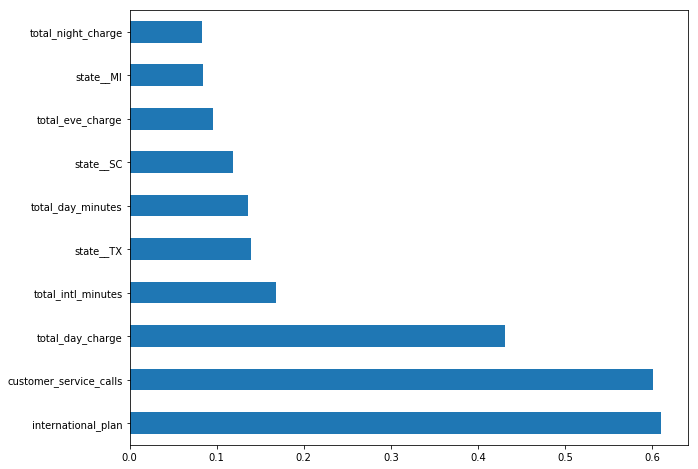

In [38]:
coefs.head(10).plot.barh(figsize=(10, 8));

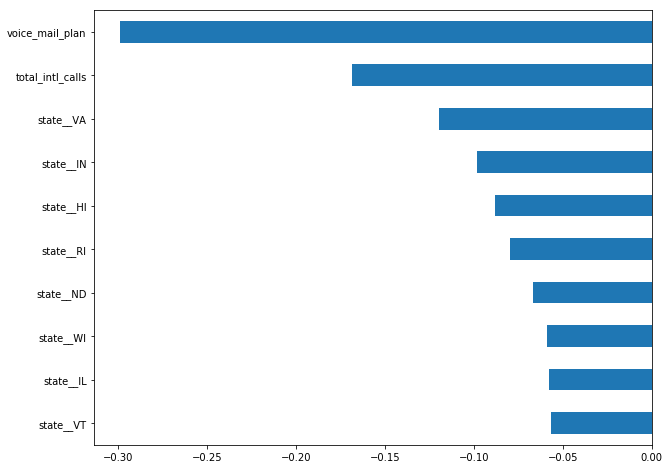

In [39]:
coefs.tail(10).plot.barh(figsize=(10, 8));

In [40]:
print(classification_report(y_test,
                            rs_cv.best_estimator_.predict_proba(X_test)[:, 1] > 0.5))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       450
           1       0.64      0.21      0.32        84

   micro avg       0.86      0.86      0.86       534
   macro avg       0.76      0.60      0.62       534
weighted avg       0.83      0.86      0.83       534



/home/infinitemonkeys/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,
                 rs_cv.best_estimator_.predict_proba(X_test)[:, 1] > 0.4)

/home/infinitemonkeys/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([[428,  22],
       [ 57,  27]])

In [42]:
y_test.value_counts()

0    450
1     84
Name: churn, dtype: int64